# SVM

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('./dataset/adult.csv', delimiter=",")

In [6]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,relationship_num,race_num,sex_num,occupation_num,marital-status_num,workclass_num,native-country_num,label_num
0,39,77516,13,2174,0,40,1,4,1,1,4,7,39,0
1,50,83311,13,0,0,13,0,4,1,4,2,6,39,0
2,38,215646,9,0,0,40,1,4,1,6,0,4,39,0
3,53,234721,7,0,0,40,0,2,1,6,2,4,39,0
4,28,338409,13,0,0,40,5,2,0,10,2,4,5,0


In [7]:
from sklearn.model_selection import train_test_split

label = df.pop('label_num')
train_set, test_set, train_label, test_label = train_test_split(df, label, stratify =label, test_size=0.30)

## Grid Search

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 100]}]

clf = GridSearchCV( SVC(), tuned_parameters,n_jobs=3,verbose=2,scoring='accuracy')
clf.fit(train_set, train_label)

print("Best parameters:")
print(clf.best_params_)
print("Complete Grid search:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed: 19.7min finished
Best parameters:
{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Complete Grid search:
0.751 (+/-0.010) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.754 (+/-0.004) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.709 (+/-0.010) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.697 (+/-0.009) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
Detailed classification report:


NameError: name 'test_labels' is not defined

## Modello Finale

In [4]:
from sklearn.svm import SVC
svm = SVC(kernel='sigmoid', C=0.5, gamma='scale', probability=True)
svm.fit(train_set, train_label)

SVC(C=0.5, kernel='sigmoid', probability=True)

In [5]:

from sklearn.metrics import classification_report
test_pred_proba_svm = svm.predict_proba(test_set)
test_pred_svm = svm.predict(test_set)
print(classification_report(test_label, 
                            test_pred_svm, 
                            target_names=['<=50', '>50']))

              precision    recall  f1-score   support

        <=50       0.77      0.78      0.78      7417
         >50       0.28      0.26      0.27      2352

    accuracy                           0.66      9769
   macro avg       0.52      0.52      0.52      9769
weighted avg       0.65      0.66      0.65      9769



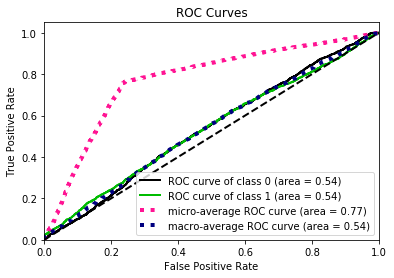

In [6]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(test_label.values, test_pred_proba_svm)
plt.show()